In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

youtube=pd.read_csv("C:/Users/neslihan.kumbasar/bootcamp/youtube_winsorize.csv", index_col=0)
youtube.head()

,sira,derece,kanal_adi,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_abone_sayisi,winsorize_goruntulenme_sayisi
0,1st,A++,Zee TV,82757.0,18752952.0,20869786591,5653.0,5895361.0,2468241402
1,2nd,A++,T-Series,12661.0,61196304.0,47548839843,5653.0,5895361.0,2468241402
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238252.0,9793305082,373.0,5895361.0,2468241402
3,4th,A++,SET India,27323.0,31180560.0,22675948293,5653.0,5895361.0,2468241402
4,5th,A++,WWE,36756.0,32852346.0,26273668433,5653.0,5895361.0,2468241402


In [3]:
pd.get_dummies(youtube["derece"]).head()

,A,A+,A++,A-,B+
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [4]:
youtube=pd.concat([youtube, pd.get_dummies(youtube["derece"])], axis=1)
youtube.head()

,sira,derece,kanal_adi,video_sayisi,abone_sayisi,goruntulenme_sayisi,winsorize_video_sayisi,winsorize_abone_sayisi,winsorize_goruntulenme_sayisi,A,A+,A++,A-,B+
0,1st,A++,Zee TV,82757.0,18752952.0,20869786591,5653.0,5895361.0,2468241402,0,0,1,0,0
1,2nd,A++,T-Series,12661.0,61196304.0,47548839843,5653.0,5895361.0,2468241402,0,0,1,0,0
2,3rd,A++,Cocomelon - Nursery Rhymes,373.0,19238252.0,9793305082,373.0,5895361.0,2468241402,0,0,1,0,0
3,4th,A++,SET India,27323.0,31180560.0,22675948293,5653.0,5895361.0,2468241402,0,0,1,0,0
4,5th,A++,WWE,36756.0,32852346.0,26273668433,5653.0,5895361.0,2468241402,0,0,1,0,0


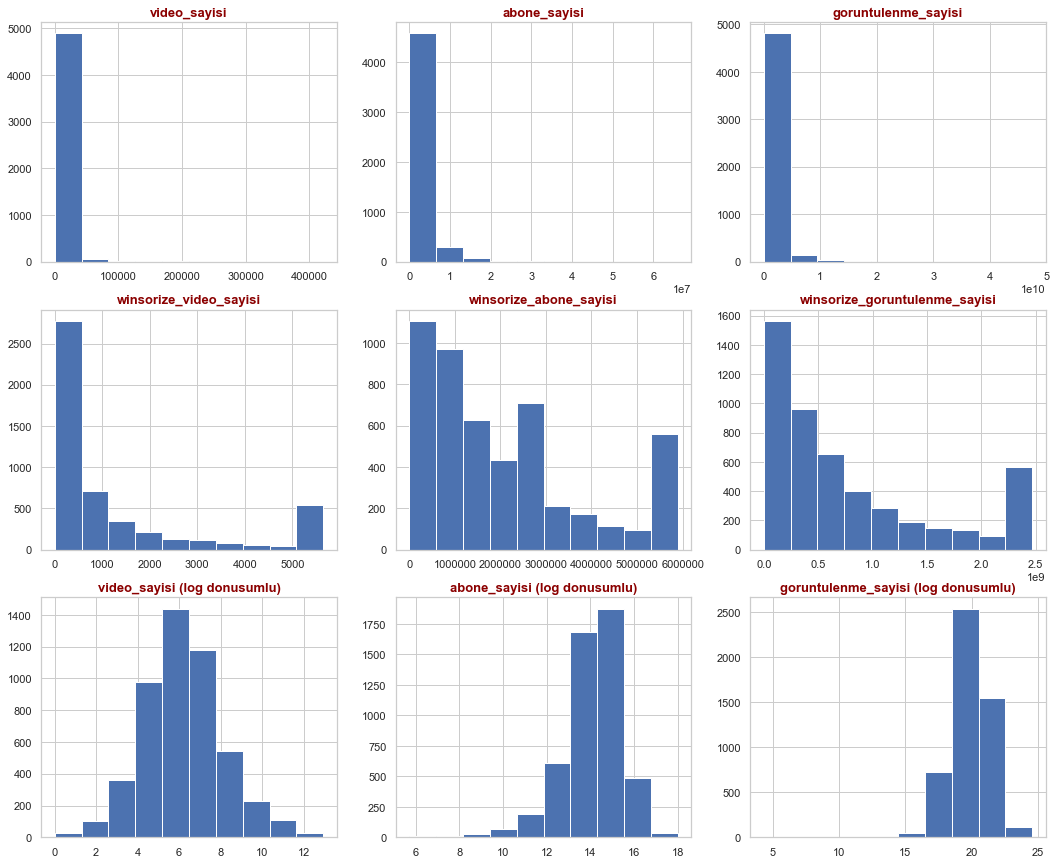

In [15]:
plt.figure(figsize=(18,15))
degiskenler=["video_sayisi","abone_sayisi","goruntulenme_sayisi"]
winsorize_degiskenler=["winsorize_video_sayisi","winsorize_abone_sayisi","winsorize_goruntulenme_sayisi"]

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.hist(youtube[degiskenler[i]])
    plt.title(degiskenler[i] , fontdict=baslik_font)
    
for i in range(3):
    plt.subplot(3,3,i+4)
    plt.hist(youtube[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i],fontdict=baslik_font)

for i in range(3):
    plt.subplot(3,3,i+7)
    plt.hist(np.log(youtube[degiskenler[i]]))
    plt.title(degiskenler[i]+' (log donusumlu)',fontdict=baslik_font)  
    
plt.show()

In [20]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

pd.options.display.float_format = '{:.5f}'.format
ozellikler=["video_sayisi","abone_sayisi","goruntulenme_sayisi"]
dagilim_testleri=pd.DataFrame(columns=['ozellik', 'jarque_bera_stats', 'jarque_bera_p_value', 'normal_stats', 'normal_p_value'])
for ozellik in ozellikler:
    jb_stats=jarque_bera(np.log(youtube[ozellik]))
    norm_stats=normaltest(np.log(youtube[ozellik]))
    dagilim_testleri= dagilim_testleri.append({'ozellik':ozellik,
                                              'jarque_bera_stats': jb_stats[0],
                                              'jarque_bera_p_value': jb_stats[1],
                                              'normal_stats':norm_stats[0],
                                              'normal_p_value':norm_stats[1]} , ignore_index=True)
dagilim_testleri    

,ozellik,jarque_bera_stats,jarque_bera_p_value,normal_stats,normal_p_value
0,video_sayisi,83.01332,0.00000,71.51148,0.00000
1,abone_sayisi,3650.19288,0.00000,1168.78182,0.00000
2,goruntulenme_sayisi,7862.31713,0.00000,1180.82317,0.00000


In [21]:
from sklearn.preprocessing import normalize

youtube["norm_winsorize_abone_sayisi"]=normalize(np.array(youtube["winsorize_abone_sayisi"]).reshape(1,-1)).reshape(-1,1)
youtube["norm_winsorize_goruntulenme_sayisi"]=normalize(np.array(youtube["winsorize_goruntulenme_sayisi"]).reshape(1,-1)).reshape(-1,1)
youtube["norm_winsorize_video_sayisi"]=normalize(np.array(youtube["winsorize_video_sayisi"]).reshape(1,-1)).reshape(-1,1)
normal_ozellikler=["winsorize_abone_sayisi","norm_winsorize_abone_sayisi",
                   "winsorize_goruntulenme_sayisi","norm_winsorize_goruntulenme_sayisi",
                   "winsorize_video_sayisi","norm_winsorize_video_sayisi"]

print("Minimum Deger \n--------------")
print(youtube[normal_ozellikler].min())
print("\nMaximum Deger \n--------------")
print(youtube[normal_ozellikler].max())

Minimum Deger 
--------------
winsorize_abone_sayisi               301.00000
norm_winsorize_abone_sayisi            0.00000
winsorize_goruntulenme_sayisi         75.00000
norm_winsorize_goruntulenme_sayisi     0.00000
winsorize_video_sayisi                 1.00000
norm_winsorize_video_sayisi            0.00001
dtype: float64

Maximum Deger 
--------------
winsorize_abone_sayisi                  5895361.00000
norm_winsorize_abone_sayisi                   0.03043
winsorize_goruntulenme_sayisi        2468241402.00000
norm_winsorize_goruntulenme_sayisi            0.03168
winsorize_video_sayisi                     5653.00000
norm_winsorize_video_sayisi                   0.03640
dtype: float64


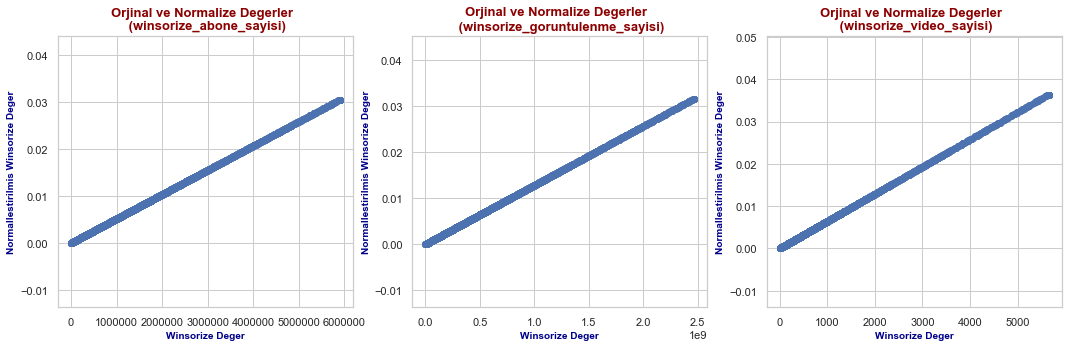

In [24]:
plt.figure(figsize=(18,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(youtube[normal_ozellikler[2*i]], youtube[normal_ozellikler[2*i+1]])
    plt.title("Orjinal ve Normalize Degerler  \n ({})" .format(normal_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Winsorize Deger", fontdict=eksen_font)
    plt.ylabel("Normallestirilmis Winsorize Deger", fontdict=eksen_font)
plt.show()

In [26]:
from sklearn.preprocessing import scale

youtube["olcekli_winsorize_abone_sayisi"]=scale(youtube["winsorize_abone_sayisi"])
youtube["olcekli_winsorize_goruntulenme_sayisi"]=scale(youtube["winsorize_goruntulenme_sayisi"])
youtube["olcekli_winsorize_video_sayisi"]=scale(youtube["winsorize_video_sayisi"])
olcekli_ozellikler=["winsorize_abone_sayisi","olcekli_winsorize_abone_sayisi",
                   "winsorize_goruntulenme_sayisi","olcekli_winsorize_goruntulenme_sayisi",
                   "winsorize_video_sayisi","olcekli_winsorize_video_sayisi"]

print("Standart Sapmalar \n--------------")
print(youtube[olcekli_ozellikler].std())
print("\n Ortalamalar \n--------------")
print(youtube[olcekli_ozellikler].mean())

Standart Sapmalar 
--------------
winsorize_abone_sayisi                    1781477.57927
olcekli_winsorize_abone_sayisi                  1.00010
winsorize_goruntulenme_sayisi           775430088.74222
olcekli_winsorize_goruntulenme_sayisi           1.00010
winsorize_video_sayisi                       1779.18117
olcekli_winsorize_video_sayisi                  1.00010
dtype: float64

 Ortalamalar 
--------------
winsorize_abone_sayisi                    2081597.00580
olcekli_winsorize_abone_sayisi                  0.00000
winsorize_goruntulenme_sayisi           782847594.72000
olcekli_winsorize_goruntulenme_sayisi           0.00000
winsorize_video_sayisi                       1288.41376
olcekli_winsorize_video_sayisi                 -0.00000
dtype: float64


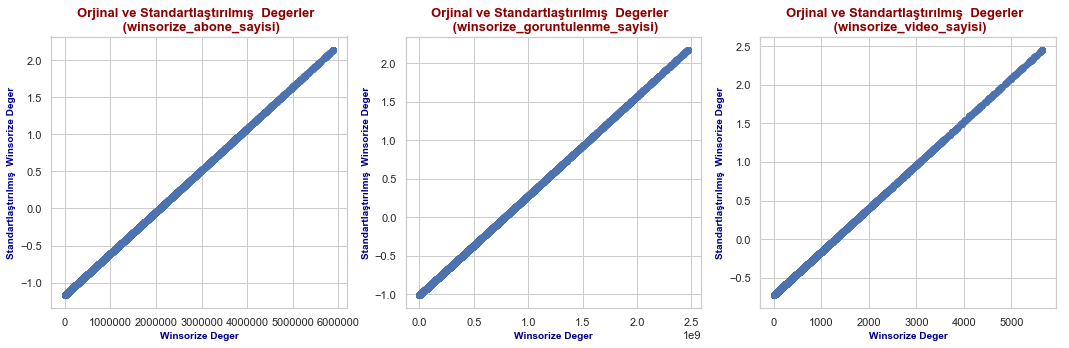

In [27]:
plt.figure(figsize=(18,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(youtube[olcekli_ozellikler[2*i]], youtube[olcekli_ozellikler[2*i+1]])
    plt.title("Orjinal ve Standartlaştırılmış  Degerler  \n ({})" .format(olcekli_ozellikler[2*i]), fontdict=baslik_font)
    plt.xlabel("Winsorize Deger", fontdict=eksen_font)
    plt.ylabel("Standartlaştırılmış  Winsorize Deger", fontdict=eksen_font)
plt.show()